In [1]:
import numpy as np
from itertools import product
# Visualization (optional)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def generate_epsilon_net(epsilon):
    """
    Generate an epsilon-net on a unit sphere in 3D.

    Parameters:
        epsilon (float): The maximum allowable distance between any point
                        on the sphere and the closest point in the epsilon-net.

    Returns:
        np.ndarray: An array of points representing the epsilon-net on the unit sphere.
    """
    # Calculate the number of divisions required based on epsilon
    num_latitude = int(np.pi / epsilon) + 1  # Number of latitude lines
    num_longitude = int(2 * np.pi / epsilon)  # Number of longitude lines

    points = []

    for i in range(num_latitude + 1):
        # Latitude angle: from 0 to pi
        theta = i * np.pi / num_latitude

        for j in range(num_longitude):
            # Longitude angle: from 0 to 2*pi
            phi = j * 2 * np.pi / num_longitude

            # Convert spherical coordinates to Cartesian coordinates
            x = np.sin(theta) * np.cos(phi)
            y = np.sin(theta) * np.sin(phi)
            z = np.cos(theta)

            points.append([x, y, z])

    return np.array(points)

In [3]:
# Example usage
epsilon = 0.5  # Set the desired epsilon value
net_points = generate_epsilon_net(epsilon)

print(f"Generated epsilon-net with {len(net_points)} points.")
# Optional: Save the points to a file
# np.savetxt("epsilon_net.txt", net_points)

Generated epsilon-net with 96 points.


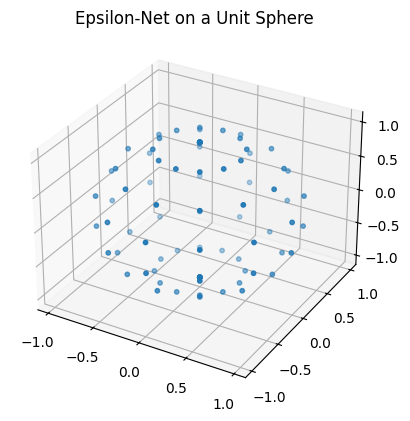

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(net_points[:, 0], net_points[:, 1], net_points[:, 2], s=10)
ax.set_title("Epsilon-Net on a Unit Sphere")
plt.show()

In [5]:
def generate_points_in_unit_ball(num_points):
    """
    Generate points uniformly distributed inside the unit ball in 3D.

    Parameters:
        num_points (int): The number of points to generate.

    Returns:
        np.ndarray: An array of points within the unit ball.
    """
    points = []
    while len(points) < num_points:
        # Generate a random point in the cube [-1, 1]^3
        point = np.random.uniform(-1, 1, size=3)
        # Check if the point is inside the unit ball
        # if np.linalg.norm(point) <= 1:
        points.append(point/np.linalg.norm(point))
    return np.array(points)

# Example usage
num_points = 1000  # Set the desired number of points
ball_points = generate_points_in_unit_ball(num_points)

print(f"Generated {len(ball_points)} points on the unit sphere.")
# Optional: Save the points to a file
# np.savetxt("unit_ball_points.txt", ball_points)

Generated 1000 points on the unit sphere.


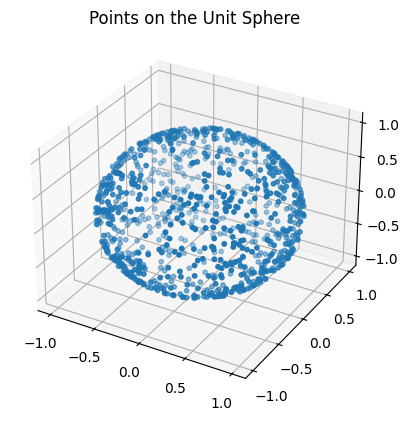

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ball_points[:, 0], ball_points[:, 1], ball_points[:, 2], s=10)
ax.set_title("Points on the Unit Sphere")
plt.show()

In [7]:
def generate_gaussian_samples(num_samples):
    """
    Generate 3-dimensional zero-mean Gaussian samples with a random PSD covariance matrix.

    Parameters:
        num_samples (int): The number of samples to generate.

    Returns:
        np.ndarray: An array of Gaussian samples.
    """
    # Generate a random positive semi-definite (PSD) covariance matrix
    A = np.random.randn(3, 3)
    covariance_matrix = np.dot(A, A.T)  # Ensures the matrix is symmetric and PSD
    # covariance_matrix = np.eye(3)
    # Generate zero-mean Gaussian samples
    samples = np.random.multivariate_normal(mean=np.zeros(3), cov=covariance_matrix, size=num_samples)
    return samples, covariance_matrix

In [8]:
num_samples = 10000  # Set the desired number of Gaussian samples
gaussian_samples, covariance_matrix = generate_gaussian_samples(num_samples)

print(f"Generated {len(ball_points)} points inside the unit ball.")
print(f"Generated {len(gaussian_samples)} Gaussian samples.")
print("Covariance matrix:")
print(covariance_matrix)

Generated 1000 points inside the unit ball.
Generated 10000 Gaussian samples.
Covariance matrix:
[[3.73126512 0.50236593 0.41316942]
 [0.50236593 2.6558976  2.54300717]
 [0.41316942 2.54300717 2.45958805]]


In [10]:
width_ball=[]
for theta in gaussian_samples:
    width_ball.append(np.max(np.dot(ball_points,theta.reshape(3,1))))
print(np.average(width_ball))

2.6147736050743


In [11]:
width_net=[]
for theta in gaussian_samples:
    width_net.append(np.max(np.dot(net_points,theta.reshape(3,1))))
print(np.average(width_net))

2.580909473941713


In [9]:
(epsilon**2)/2*np.sqrt(np.matrix.trace(covariance_matrix))

0.37179359955058766

In [27]:
# Compute the difference and bound vectors
difference = [width_ball[i] - width_net[i] for i in range(num_samples)]
bound = [np.linalg.norm(gaussian_samples[i]) * epsilon for i in range(num_samples)]

# Convert lists to NumPy arrays for efficient processing
difference = np.array(difference)
bound = np.array(bound)

# Check if the condition holds for all rows
condition = np.abs(difference) < bound

# If you want to check if this condition is true for all rows
all_valid = np.all(condition)

# Print the results
print(f"Condition holds for all rows: {all_valid}")

Condition holds for all rows: True


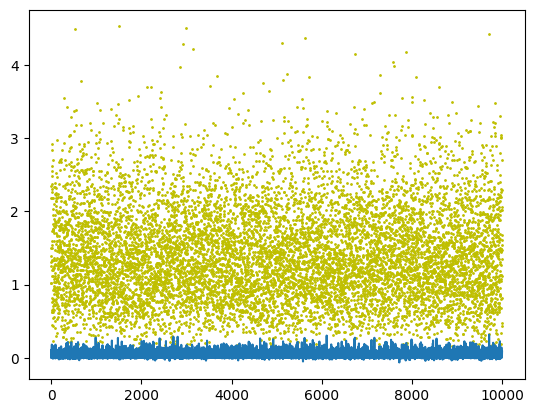

In [28]:
plt.scatter([*range(num_samples)],bound,s=1,c='y')
plt.plot([*range(num_samples)],difference)

(array([2.200e+01, 2.474e+03, 4.244e+03, 2.038e+03, 7.750e+02, 2.990e+02,
        9.400e+01, 3.600e+01, 1.400e+01, 4.000e+00]),
 array([-0.06475491, -0.02671491,  0.01132509,  0.0493651 ,  0.0874051 ,
         0.12544511,  0.16348511,  0.20152511,  0.23956512,  0.27760512,
         0.31564512]),
 <BarContainer object of 10 artists>)

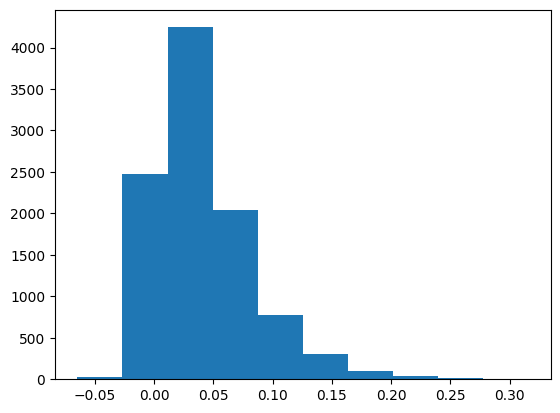

In [29]:
plt.hist(difference)

(array([1250., 2715., 2645., 1758.,  984.,  416.,  169.,   47.,   12.,
           4.]),
 array([0.02526495, 0.53425537, 1.04324579, 1.5522362 , 2.06122662,
        2.57021703, 3.07920745, 3.58819786, 4.09718828, 4.60617869,
        5.11516911]),
 <BarContainer object of 10 artists>)

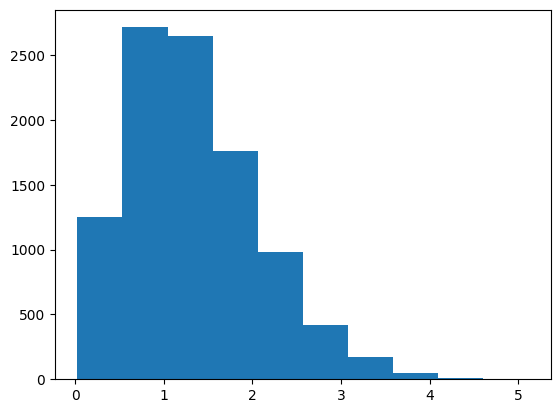

In [133]:
plt.hist(bound)